# Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

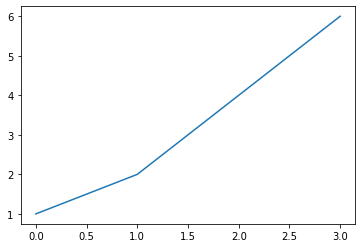

In [13]:
plt.plot([1,2,4,6]);

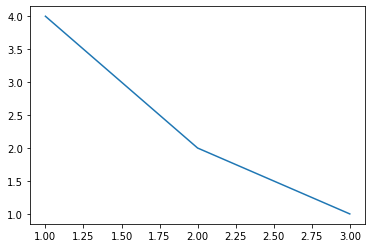

In [14]:
plt.plot([1,2,3],[4,2,1]);

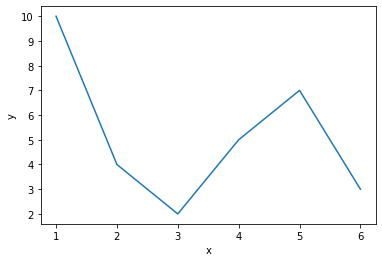

In [15]:
x = [1,2,3,4,5,6]
y = [10,4,2,5,7,3]

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y);

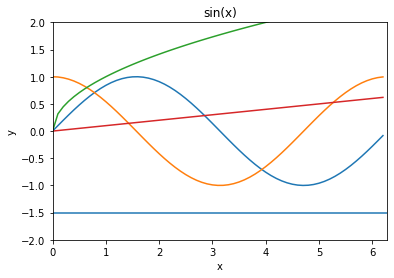

In [16]:
x = np.arange(0, 2*np.pi, 0.1)
plt.xlim(0,2*np.pi)
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x)')
plt.plot(x, np.sin(x),x, np.cos(x),x,np.sqrt(x),x,0.1*x);
plt.axhline(y=-1.5);

* reference: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

# Linear Regression

### Regression toward the mean   
Galton observed that extreme characteristics (e.g., height) in parents are not passed on completely to their offspring. Rather, the characteristics in the offspring regress towards a mediocre point (a point which has since been identified as the mean).

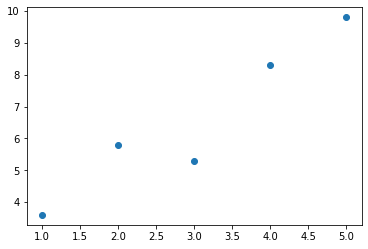

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[1.,2.,3.,4.,5.],[3.6,5.8,5.3,8.3,9.8]])
plt.plot(data[0],data[1],'o',label='data');

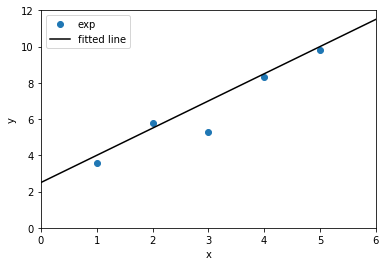

In [14]:
plt.plot(data[0],data[1],'o',label='exp');
plt.xlim(0,6);plt.ylim(0,12);plt.xlabel('x');plt.ylabel('y')

x=np.arange(0,10,0.1)
a=1.5;b=2.5
y=a*x+b
plt.plot(x,y,'k-',label='fitted line');
plt.legend();

### How to find the best fitting?

### Least squares method

최소제곱법(least squares method)은 실험이나 관측을 통해 주어진 데이터로부터 패턴을 예측하는 간단하며 효과적인 방법입니다. 위의 예시처럼 데이터가 주어져 있고 이를 통해 x와 y 사이에 선형 관계를 추측하는 과정을 살펴봅시다. x와 y가 선형 관계를 가지고 있다고 가정하면  
\begin{equation}
y=ax + b
\end{equation}

우리가 해야하는 일은 데이터로부터 $a,b$ 값을 얻는 것입니다. 방정식과 데이터 사이에 오차가 가장 작게 만드는 $a,b$가 최적의 값이라고 하면 결국 이 문제는 다음의 값을 최소화하는 문제가 됩니다.  
\begin{equation}
\chi = \sum_i (y_i - a x_i +b)^2 
\end{equation}
$\chi$가 최소값이 되려면 극값이어야 하므로 다음의 조건을 만족해야 합니다.
\begin{equation}
\frac{\partial \chi}{\partial a} =\frac{\partial \chi}{\partial b}=0. 
\end{equation}
따라서 아래의 두 식을 얻을 수 있습니다.
\begin{equation}
\sum_i (2a x_i^2 -2 x_i y_i + 2 b x_i) =0, \\  
\sum_i (2b - 2 y_i + 2a x_i)=0.  
\end{equation}
식을 간단히 하게 위해 양변을 $N$으로 나누고 평균값들을 다음처럼 정의합니다.
\begin{equation}
\frac{1}{N}\sum_i x_i = \langle X \rangle, \quad
\frac{1}{N}\sum_i x_i^2 = \langle X^2 \rangle, \quad
\frac{1}{N}\sum_i y_i = \langle Y \rangle, \quad
\frac{1}{N}\sum_i x_i y_i = \langle XY \rangle. 
\end{equation}
따라서 우리가 풀어야 하는 연립방정식은
\begin{equation}
a \langle X \rangle + b = \langle Y \rangle, \\
a \langle X^2 \rangle + b \langle X \rangle = \langle XY \rangle,
\end{equation}
이 된다.
최종적으로 최소제곱법으로 구한 기울기와 y절편은 다음과 같다.
\begin{equation}
a=\frac{\langle XY \rangle - \langle X \rangle \langle Y \rangle}{\langle X^2 \rangle - \langle X\rangle^2}, \quad
b=\frac{\langle X^2 \rangle \langle Y\rangle - \langle X \rangle \langle X Y \rangle}{\langle X^2 \rangle - \langle X\rangle^2}
\end{equation}


In [10]:
# 위에서 주어진 데이터에 대해서 a, b를 구해보자.
data = np.array([[1.,2.,3.,4.,5.],[3.6,5.8,5.3,8.3,9.8]])
xdata = data[0]
ydata = data[1]

N=len(xdata)
X=sum(xdata)/N
Y=sum(ydata)/N
X2=sum([i**2 for i in xdata])/N
XY=sum(xdata*ydata)/N

a2,b2=(XY-X*Y)/(X2-X*X),(X2*Y-X*XY)/(X2-X*X)
a2,b2

(1.4900000000000002, 2.0899999999999963)

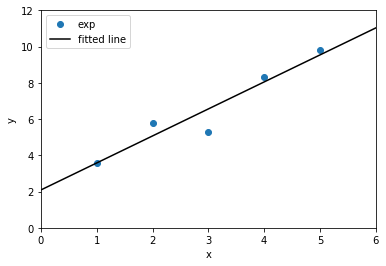

In [15]:
plt.plot(data[0],data[1],'o',label='exp');
plt.xlim(0,6);plt.ylim(0,12);plt.xlabel('x');plt.ylabel('y')

x=np.arange(0,10,0.1)
y=a2*x+b2
plt.plot(x,y,'k-',label='fitted line');
plt.legend();

### Regression

다음처럼 주어지는 데이터가 있다고 하자.
$$ \{ (\vec{x_1},y_1),\cdots, (\vec{x_N}, y_N) \}  $$
위의 데이터로부터 추정할 수 있는 함수를 다음처럼 정의하자.
$$ y = w_0 + w_1 x_1 + w_2 x_2 + w_n x_n = \mathbf{w}^T x $$
주어진 데이터를 제일 잘 설명하는 $\mathbf{w}$를 찾는 과정을 상상하자. 위의 최소제곱법처럼 오차가 최소가 되도록 하는 과정을 통해 회귀함수를 구해보자. 즉 $n+1$차원에서 위의 과정과 동일한 계산을 하는 것이며 구체적으로 오차는 다음과 같이 주어진다.
$$ E(\mathbf{w}) = \sum_{i=1}^{N} (y- \mathbf{w}^T x_i).$$

$N$개의 $\vec{x}$를 세로로 나열한 행렬을 $\mathbf{X}$라고 하고 $y$로 이루어진 열벡터를 $\mathbf{Y}$라 하면 $E(\mathbf{w})$는 다음처럼 쓸 수 있다.
$$E(\mathbf{w}) = (\mathbf{Y} - \mathbf{X} \mathbf{w})^T (\mathbf{Y}- \mathbf{X} \mathbf{w})$$
이 값을 최소화하려면 $w$로 미분하여 0이 되는 값을 구하면 된다. 간단한 계산을 거치면 계수 $\mathbf{w}$는 다음처럼 구할 수 있다.
$$\mathbf{w}=(\mathbf{X}^T \mathbf{X})^{-1} X^T \mathbf{Y}.$$

간단한 계산과정은 다음과 같다. 
$$ \frac{\partial }{\partial w} (Y-Xw)^T (Y-X w) =\frac{\partial }{\partial w} (Y^T- w^T X^T) (Y-X w) \\ 
= \frac{\partial }{\partial w} Y^T Y -Y^T X w - w^T X^T Y + w^T X^T X w \\
= - Y^T X - Y^T X + 2 w^T X^T X = 0. $$  
따라서 $Y^T X =  w^T X^T X$ 이며 전체를 transpose하고 정리하면 $X^T Y =  X^T X w$이므로
$$\mathbf{w}=(\mathbf{X}^T \mathbf{X})^{-1} X^T \mathbf{Y}.$$

## scikit-learn

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
data = np.array([[1.,2.,3.,4.,5.],[3.6,5.8,5.3,8.3,9.8]])

In [77]:
X=[[i] for i in data[0]]
y=[[i] for i in data[1]]
reg=LinearRegression() 
X,y

([[1.0], [2.0], [3.0], [4.0], [5.0]], [[3.6], [5.8], [5.3], [8.3], [9.8]])

In [78]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
reg.coef_, reg.intercept_

(array([[1.49]]), array([2.09]))

In [80]:
x_new=[[1.5]]
reg.predict(x_new)

array([[4.325]])

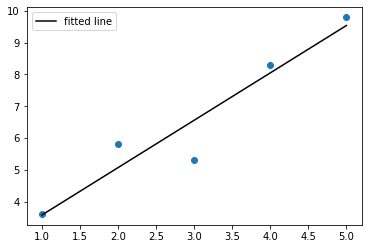

In [81]:
plt.plot(data[0],data[1],'o')
plt.plot(X,reg.predict(X),'k-',label='fitted line');
plt.legend();

In [82]:
reg.score(X,y)

0.9079420906265334